In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

from acquire import get_titanic_data
from prepare import prep_titanic

In [2]:
df = get_titanic_data()

In [3]:
df = prep_titanic(df)

In [4]:
df.dtypes

passenger_id         int64
survived             int64
pclass               int64
sex                 object
age                float64
sibsp                int64
parch                int64
fare               float64
embarked            object
class               object
embark_town         object
alone                int64
embarked_encode      int64
dtype: object

In [6]:
train, test = train_test_split(
    df, test_size=.30, random_state=123, stratify=df[['survived']])

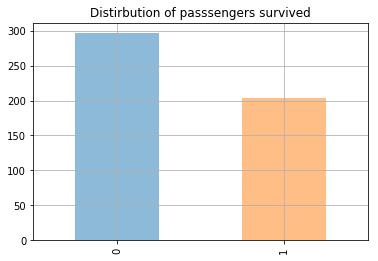

In [7]:
train.survived.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of passsengers survived")
plt.grid(b = True , which = "major")

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


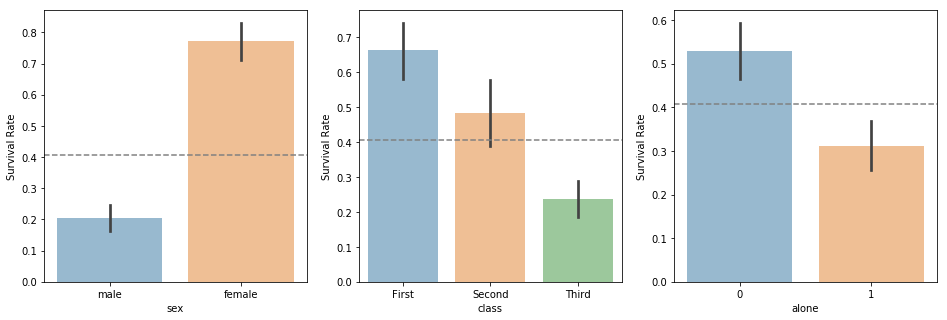

In [8]:
features = ['sex', 'class', 'alone']

# The _ is used for the first variable because we are not going
# to use it.
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys


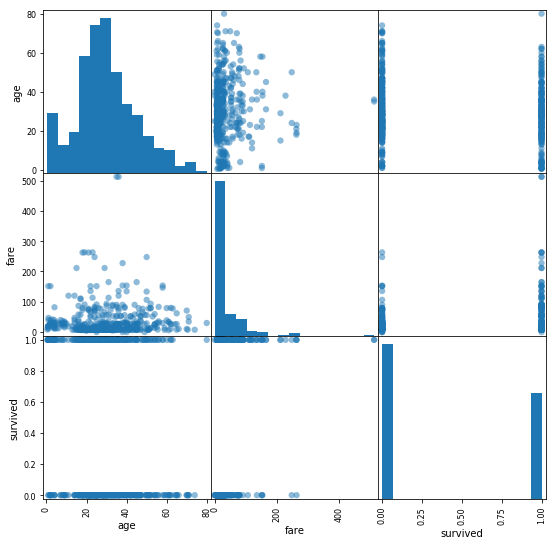

In [9]:
# from pandas.tools.plotting import scatter_matrix
# from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(
    train[['age','fare','survived']], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)

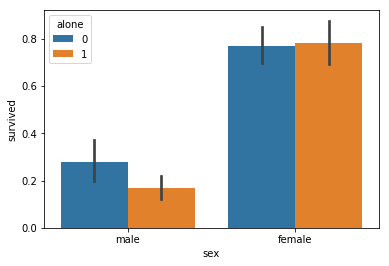

In [10]:
sns.barplot('sex', 'survived', data=train, hue='alone')

In [11]:
train.groupby(['sex','alone'])['survived'].count()

sex     alone
female  0        112
        1         65
male    0        107
        1        215
Name: survived, dtype: int64

In [12]:
df_family = train[train['alone']==0]

In [13]:
train.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'embark_town', 'alone', 'embarked_encode'],
      dtype='object')

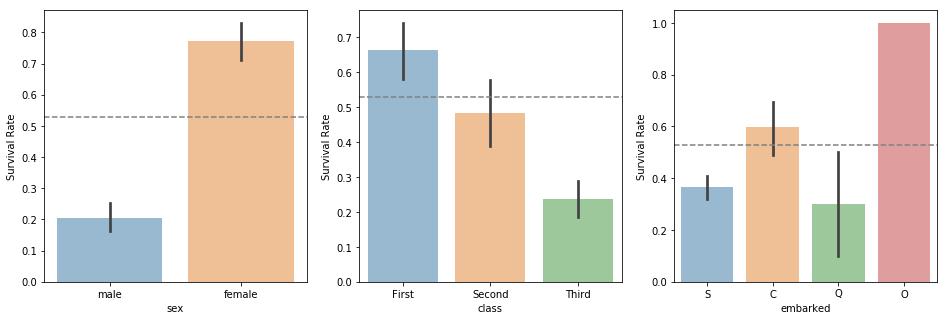

In [14]:
features = ['sex', 'class', 'embarked']

# The _ is used for the first variable because we are not going
# to use it.
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = df_family.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

In [16]:
#pd.crosstab(df_family.class, df_family.embarked, margine=True).style.background_gradient(cmap='YlOrRd')

In [17]:
import scipy as sp 
import numpy as np

sp.stats.ttest_ind(
    train[train.survived == 1].age.dropna(),
    train[train.survived == 0].age.dropna())

# is the t-statistic < -1.96 or > 1.96?  if so, then look at p-value to ensure it is less than our alpha of .05.

Ttest_indResult(statistic=-2.012224018867312, pvalue=0.04473535126710687)

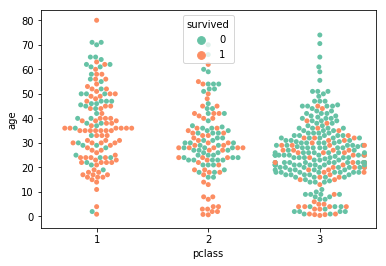

In [18]:
sns.swarmplot(x="pclass", y="age", data=train, hue="survived", palette="Set2")

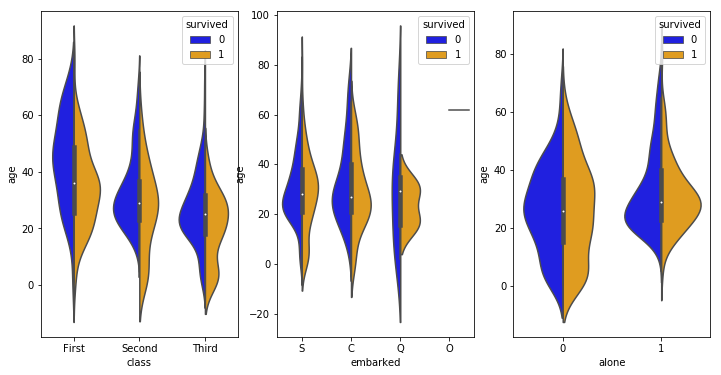

In [19]:
# 3. violin plot
features = ['class', 'embarked', 'alone']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'age', hue='survived',
        data=train, split=True, ax=ax[i], palette=['blue','orange'])

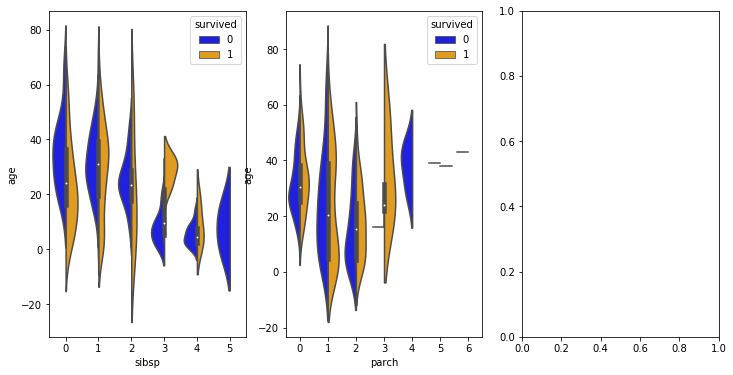

In [20]:
# 3. violin plot
features = ['sibsp', 'parch']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'age', hue='survived',
        data=df_family, split=True, ax=ax[i], palette=['blue','orange'])

In [21]:
# 3. violin plot
sns.violinplot('sibsp', 'parch', hue='survived',
        data=df_family, split=True, ax=ax[i], palette=['blue','orange'])

for those traveling with family:
> less than 3 children - less likely

3 children - more likely

traveling with spouse only - less likely

0 parch, 1 sibsp - likely to be traveling as a couple

0 sibsp - more likely to survive (child alone with parent)

In [22]:
pd.crosstab(df_family.pclass, df_family.survived, margins=True).style.background_gradient(cmap='YlOrRd')


survived,0,1,All
pclass,,,
1,17,55,72
2,23,35,58
3,63,26,89
All,103,116,219


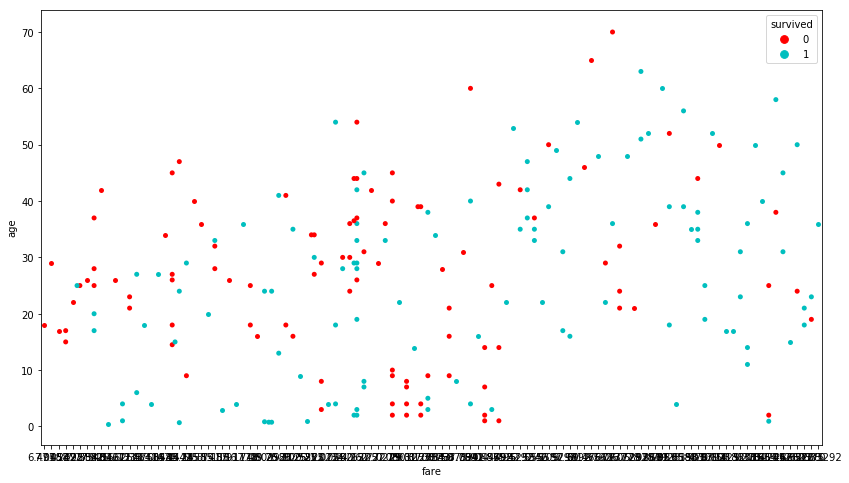

In [23]:
plt.figure(figsize=(14,8))

sns.swarmplot(x='fare', y='age', hue='survived',
              palette=["r", "c"], data=df_family)

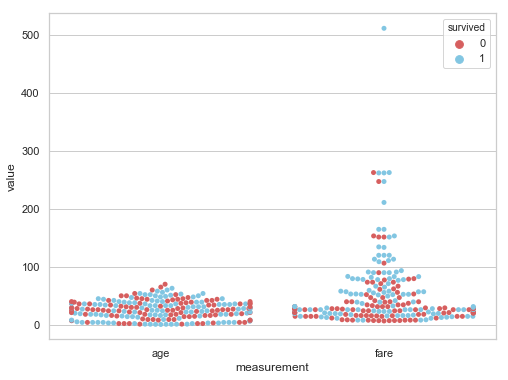

In [24]:
sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(df_family[['survived','age','fare']], "survived", var_name="measurement")

plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="survived",
              palette=["r", "c", "y"], data=df_melt)

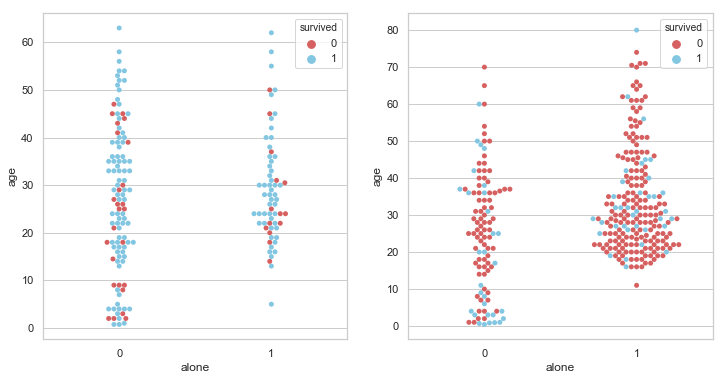

In [25]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))


# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="alone", y="age", hue="survived",
              palette=["r", "c", "y"], ax=ax[0], data=train[train['sex']=='female'])
sns.swarmplot(x="alone", y="age", hue="survived",
              palette=["r", "c", "y"], ax=ax[1], data=train[train['sex']=='male'])
